Redes neuronales enfocadas al reconocimiento de imagenes. 

In [1]:
from keras.datasets import mnist

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import tensorflow as tf

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D
from tensorflow.keras.utils import to_categorical


In [5]:
import numpy as np

In [6]:
# to calculate accuracy
from sklearn.metrics import accuracy_score

In [7]:
from keras.layers import Dense, Activation, Flatten

In [8]:
######CNN-DIGITS IN GRAY SCALE

# loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [9]:
X_train.shape[0]

60000

In [10]:
# building the input vector from the 28x28 pixels
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [11]:
X_train.shape

(60000, 28, 28, 1)

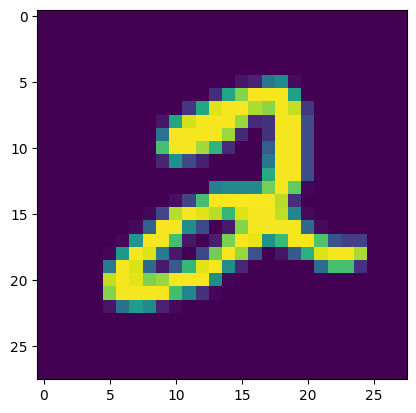

In [12]:
#See some images of the data set
plt.imshow(X_train[5])

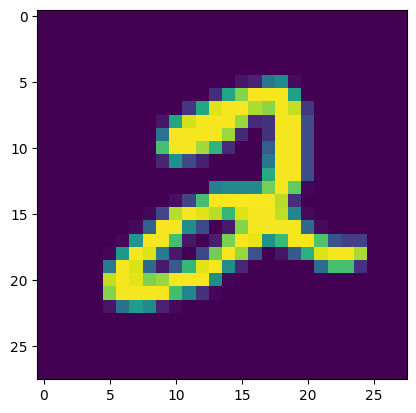

In [13]:
#See some images of the data set
plt.imshow(X_train[5])

In [14]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [15]:
display(X_train)

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [16]:
# normalizing the data to help with the training
X_train /= 255
X_test /= 255

In [17]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)

Shape before one-hot encoding:  (60000,)


In [18]:
Y_train = to_categorical(y_train, num_classes=n_classes)
Y_test = to_categorical(y_test, num_classes=n_classes)

print("Shape after one-hot encoding: ", Y_train.shape)

Shape after one-hot encoding:  (60000, 10)


In [19]:
# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [21]:
# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - accuracy: 0.9413 - loss: 0.2016 - val_accuracy: 0.9732 - val_loss: 0.0895
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.9823 - loss: 0.0603 - val_accuracy: 0.9810 - val_loss: 0.0563
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.9892 - loss: 0.0356 - val_accuracy: 0.9837 - val_loss: 0.0479
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.9932 - loss: 0.0230 - val_accuracy: 0.9842 - val_loss: 0.0454
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.9960 - loss: 0.0141 - val_accuracy: 0.9805 - val_loss: 0.0594
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.9976 - loss: 0.0092 - val_accuracy: 0.9812 - val_loss: 0.0655
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.9977 - loss: 0.0075 - val_accuracy: 0.9827 - val_loss: 0.0588
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.9991 - loss: 0.0043 - 

In [22]:
X_train.shape

(60000, 28, 28, 1)

In [23]:
Y_train.shape

(60000, 10)

In [24]:
########################################################################
#########################CIFAR-10 Dataset using CNNs####################
########################################################################

Redes neuronales no supervisadas enfocadas al reconocimiento de imagenes.

In [25]:
from keras.datasets import cifar10

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
import tensorflow as tf
import numpy as np

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D
from keras.utils import to_categorical

In [29]:
# to calculate accuracy
from sklearn.metrics import accuracy_score
from keras.layers import Dense, Activation, Flatten

In [30]:
# loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [31]:
#Dimension of training set
X_train.shape

(50000, 32, 32, 3)

In [32]:
display(X_train[1])

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

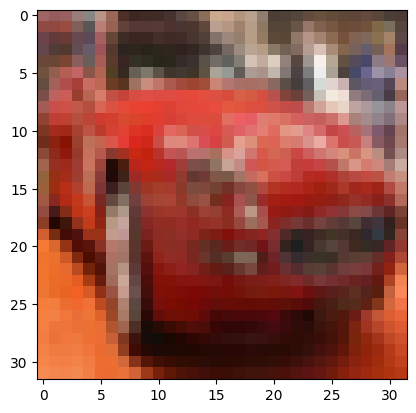

In [33]:
#See some images of the data set
plt.imshow(X_train[5])

In [34]:
display(y_train)

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [35]:
# # building the input vector from the 32x32 pixels
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [36]:
# normalizing the data to help with the training
X_train /= 255
X_test /= 255

In [37]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = to_categorical(y_train, n_classes)
Y_test = to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


In [38]:
# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(32,32,3)))
model.add(MaxPool2D(pool_size=(2,2)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

In [39]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [40]:
# training the model for 20 epochs
history = model.fit(X_train, Y_train, batch_size=128, epochs=20, validation_data=(X_test, Y_test))

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.4318 - loss: 1.6108 - val_accuracy: 0.5305 - val_loss: 1.3484
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.5560 - loss: 1.2675 - val_accuracy: 0.5650 - val_loss: 1.2407
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.6001 - loss: 1.1454 - val_accuracy: 0.5762 - val_loss: 1.2020
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.6262 - loss: 1.0729 - val_accuracy: 0.6134 - val_loss: 1.1129
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.6480 - loss: 1.0114 - val_accuracy: 0.6243 - val_loss: 1.0709
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.6663 - loss: 0.9591 - val_accuracy: 0.6311 - val_loss: 1.0465
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.6846 - loss: 0.9117 - val_accuracy: 0.6332 - val_loss: 1.0429
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.6975 - loss: 0.8732 - 

In [42]:
import numpy as np

best_acc = np.max(history.history['accuracy'])
best_val_acc = np.max(history.history['val_accuracy'])
best_loss = np.min(history.history['loss'])
best_val_loss = np.min(history.history['val_loss'])

print(f"Best Training Accuracy: {best_acc:.4f}")
print(f"Best Validation Accuracy: {best_val_acc:.4f}")
print(f"Lowest Training Loss: {best_loss:.4f}")
print(f"Lowest Validation Loss: {best_val_loss:.4f}")

Best Training Accuracy: 0.8189
Best Validation Accuracy: 0.6571
Lowest Training Loss: 0.5242
Lowest Validation Loss: 1.0155


Se completo el codigo para CNN cambiando el numero de pixels por $32 \times 32 \times 3$ para que pueda ingresar a la red neuronal. Se utilizo la misma red neuornal implementada en clase con la misma tasa de aprendizaje y función de costos. La modificacion que se añadio a la etapa de entrenamiento es el numero de epocas, aumentando a 20 epocas comparadas con las 10 epocas de la clase. 